In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
import glob
import random

# 저장된 훈련모델 불러오는 방법
model = load_model('/content/drive/My Drive/Colab Notebooks/데이터/my_model.h5')

# 모델 임포트 후 의상 부분만 추출하는 코드.
# GPU메모리 증가 허용하기 코드
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/input반팔티.png'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

# 이미지 자르고, 투명값 검정배경 입혀주기.
image_crop = image[:,512:]
image_crop = np.uint8(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28,1))

#예측 수행
input_predict = model.predict(input_image)+1

#예측 결과 확인
max_value = np.max(input_predict)
max_idx = np.where(input_predict == max_value)
predict_idx = max_idx[1][0]

def recommend(predict_idx):
    # 0이 t-shirt 라는 가정
    if predict_idx == 0:
        t_shirt_path = glob.glob("/content/drive/My Drive/Colab Notebooks/반팔티코디예시/*.jpg")

        # 코디 예시 사진과 url은 (브랜드 - 질 스튜어트 뉴욕)
        t_shirt_cody_url_list = ["https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJU0D704D2&ITHR_CD=IT0401&etag1=009_A019_E269&etag2=0&etag3=1&etag4=JNTS0B750WT",
                                 "https://www.lfmall.co.kr/product.do?cmd=getProductDetail&origin=outlet&PROD_CD=WYPA9B083T2&ITHR_CD=IT0401",
                                 "https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJA9B583N3&etag1=004_A011_E043&etag2=0&etag3=23&etag4=1017"]
        
        t_shirt_img_url_list = []

        for idx, img in enumerate(t_shirt_path):
            t_shirt = cv2.imread(img)
            t_shirt_img_url_list.append([t_shirt, t_shirt_cody_url_list[idx]])

        return t_shirt_img_url_list

    # 아직 미완성... 
    elif predict_idx == 1:
        # t_shirt_path = glob.glob("경로설정")

        # # 코디 예시 사진과 url은 (브랜드 - 질 스튜어트 뉴욕)
        # t_shirt_cody_url_list = ["url 따오기"]

        # t_shirt_img_url_list = []

        # for idx, img in enumerate(t_shirt_path):
        #     t_shirt = cv2.imread(img)
        #     t_shirt_img_url_list.append([t_shirt, t_shirt_cody_url_list[idx]])
        pass

    elif predict_idx == 2:
        # t_shirt_path = glob.glob("경로설정")

        # # 코디 예시 사진과 url은 (브랜드 - 질 스튜어트 뉴욕)
        # t_shirt_cody_url_list = ["url 따오기"]

        # t_shirt_img_url_list = []

        # for idx, img in enumerate(t_shirt_path):
        #     t_shirt = cv2.imread(img)
        #     t_shirt_img_url_list.append([t_shirt, t_shirt_cody_url_list[idx]])
        pass

    elif predict_idx == 3:
        # t_shirt_path = glob.glob("경로설정")

        # # 코디 예시 사진과 url은 (브랜드 - 질 스튜어트 뉴욕)
        # t_shirt_cody_url_list = ["url 따오기"]

        # t_shirt_img_url_list = []

        # for idx, img in enumerate(t_shirt_path):
        #     t_shirt = cv2.imread(img)
        #     t_shirt_img_url_list.append([t_shirt, t_shirt_cody_url_list[idx]])
        pass

    elif predict_idx == 4:
        # t_shirt_path = glob.glob("경로설정")

        # # 코디 예시 사진과 url은 (브랜드 - 질 스튜어트 뉴욕)
        # t_shirt_cody_url_list = ["url 따오기"]

        # t_shirt_img_url_list = []

        # for idx, img in enumerate(t_shirt_path):
        #     t_shirt = cv2.imread(img)
        #     t_shirt_img_url_list.append([t_shirt, t_shirt_cody_url_list[idx]])
        pass

# recommend return 값 받기
recommend_img_url_list = recommend(predict_idx)

# 랜덤초이스방법
random_choice = random.choice(recommend_img_url_list)
random_img, random_url = random_choice

# 3가지 종류 그냥 출력해주기.
recommend_img_list = []
recommend_url_list = []
for img, url in recommend_img_url_list:
    recommend_img_list.append(img)
    recommend_url_list.append(url)

# 이미지 변수 하나에 담기
recommend_img1, recommend_img2, recommend_img3 = recommend_img_list
# # url 변수 하나에 담기
recommend_url1, recommend_url2, recommend_url3 = recommend_url_list


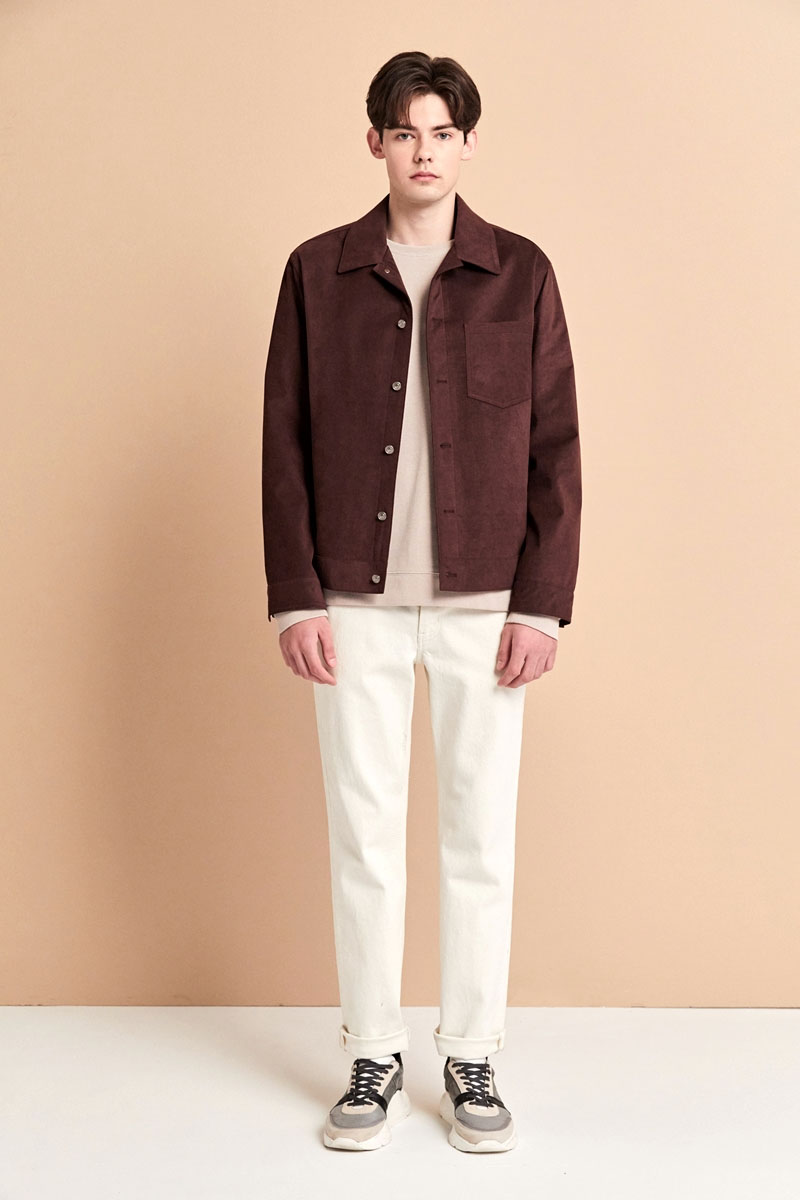

https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJU0D704D2&ITHR_CD=IT0401&etag1=009_A019_E269&etag2=0&etag3=1&etag4=JNTS0B750WT


In [4]:
cv2_imshow(recommend_img1)
print(recommend_url1)